In [92]:
from keras.datasets import cifar10

In [93]:
from keras.models import Model
from keras.layers import Flatten,Dropout,Dense
from keras.utils import to_categorical

In [94]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [95]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [96]:
x_train.shape
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [97]:
datagen=ImageDataGenerator(rescale=1.0/255,validation_split=0.2)

In [98]:
tg=datagen.flow(x_train,y_train,batch_size=32,shuffle=True,subset='training')
vg=datagen.flow(x_test,y_test,batch_size=32,subset='validation')

In [99]:
from keras.applications import VGG16

In [100]:
base_model=VGG16(weights='imagenet',include_top=False,input_shape=(32,32,3))

In [101]:
for layer in base_model.layers:
  layer.trainable=False

In [102]:
x=Flatten()(base_model.output)
x=Dense(128,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(128,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(128,activation='relu')(x)
x=Dropout(0.2)(x)
preds=Dense(10,activation='softmax')(x)


In [103]:
model=Model(inputs=base_model.input,outputs=preds)

In [104]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [105]:
history=model.fit(tg,validation_data=vg,epochs=30)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.1935 - loss: 2.1862 - val_accuracy: 0.4110 - val_loss: 1.6694
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3817 - loss: 1.7158 - val_accuracy: 0.4735 - val_loss: 1.5016
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4383 - loss: 1.5834 - val_accuracy: 0.4850 - val_loss: 1.4358
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4665 - loss: 1.5106 - val_accuracy: 0.5090 - val_loss: 1.3888
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4926 - loss: 1.4480 - val_accuracy: 0.5105 - val_loss: 1.3575
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4973 - loss: 1.4212 - val_accuracy: 0.5250 - val_loss: 1.3270
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5145 - loss: 1.3905 - val_accuracy: 0.5360 - val_loss: 1.3144
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5205 - loss: 1

In [106]:
for layer in base_model.layers[-5:]:
  layer.trainable=True
# for layer in base_model.layers[-4:]:
#     layer.trainable=True

In [107]:
x=Flatten()(base_model.input)
x=Dense(128,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(64,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(32,activation='relu')(x)
x=Dropout(0.2)(x)
predss=Dense(10,activation='softmax')(x)

In [108]:
model=Model(inputs=base_model.input,outputs=predss)

In [109]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [110]:
nh=model.fit(tg,validation_data=vg,epochs=30)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1687 - loss: 2.2297 - val_accuracy: 0.3200 - val_loss: 1.9919
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2673 - loss: 2.0136 - val_accuracy: 0.3620 - val_loss: 1.8486
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2985 - loss: 1.9324 - val_accuracy: 0.3775 - val_loss: 1.7756
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3239 - loss: 1.8735 - val_accuracy: 0.3830 - val_loss: 1.7584
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3335 - loss: 1.8471 - val_accuracy: 0.4095 - val_loss: 1.7134
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3458 - loss: 1.8011 - val_accuracy: 0.4100 - val_loss: 1.6871
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3600 - loss: 1.7845 - val_accuracy: 0.4185 - val_loss: 1.6570
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3665 - loss: 1.7636 - 

In [111]:
pred_values=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [112]:
labels=list(tg.class_indices.keys())
n=299
plt.imshow(x_test[n])
print("predicted:",labels[np.argmax(pred_value[n])])
print("actual:",labels[np.argmax(y_test[n])])

AttributeError: 'NumpyArrayIterator' object has no attribute 'class_indices'

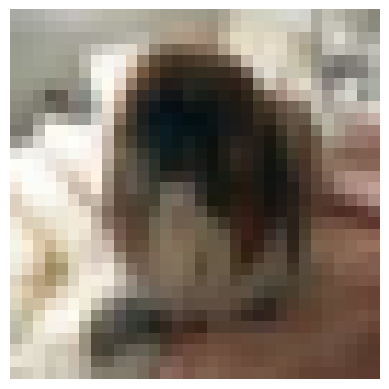

predicted class index: 5
actual class index: 5


In [113]:

n = 200
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(x_test[n])
plt.axis('off')  # Remove axis ticks and labels
plt.show()

# Print predictions without label names
print("predicted class index:", np.argmax(pred_values[n]))
print("actual class index:", np.argmax(y_test[n]))

In [ ]:
help(ImageDataGenerator)